# Make Figure 3A: EGFR mutation status

This notebooks makes Figure 3A. It shows the mutation type abundance for EGFR across the different cancers. 

In [1]:
import cptac
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plot_utils as p


/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')
#cptac version
cptac.version()   

'0.8.6'

# Step 1 Create data frames with Mutation Types 

For each cancer type we need to create a df that has the mutation type for each sample. 


First, load in cptac datasets

In [3]:
en = cptac.Endometrial()
hn = cptac.Hnscc()
l = cptac.Luad()
o = cptac.Ovarian()
c = cptac.Ccrcc()
col = cptac.Colon()
g = cptac.Gbm()
b = cptac.Brca()
ls = cptac.Lscc()

Second, call get_geneotype_all_vars for EGFR for each cancer type. This returns a df with mutation, location, and mutation_status. For individuals with multiple mutations, we report a single mutation type based on the following priority: deletion, truncation, missense, amplification, inframe, silent, and wildtype.

In [4]:
endo = en.get_genotype_all_vars("EGFR")
gbm = g.get_genotype_all_vars("EGFR")
hnscc = hn.get_genotype_all_vars("EGFR")
ovar = o.get_genotype_all_vars("EGFR")
cc = c.get_genotype_all_vars("EGFR")
colon = col.get_genotype_all_vars("EGFR")
ld = l.get_genotype_all_vars("EGFR")
brca = b.get_genotype_all_vars("EGFR")
lscc = ls.get_genotype_all_vars("EGFR")

In [5]:
#example 
gbm.head()

Name,Mutation,Location,Mutation_Status
Patient_ID,,,
C3L-00104,Amplification,Amplification,Single_mutation
C3L-00365,Missense_Mutation,p.G665D,Multiple_mutation
C3L-00674,Amplification,Amplification,Single_mutation
C3L-00677,Amplification,Amplification,Single_mutation
C3L-01040,Amplification,Amplification,Single_mutation


# Step 2: Match Mutation Labels

Change labels to to match desired final figure. 

In [6]:
# Simplify mutation names
dfs = [endo, gbm, hnscc, ovar, cc, colon, ld, brca, lscc, cc]
for df in dfs:
    df['Mutation'].where(df['Mutation'] != 'Missense_Mutation', 'Missense', inplace = True) # replaces when false
    df['Mutation'].where(df['Mutation'] != 'Wildtype_Tumor', 'Wildtype', inplace = True)
    df['Mutation'].where(df['Mutation'] != 'In_Frame_Del', 'Indel', inplace = True)
    df['Mutation'].where(df['Mutation'] != 'Nonsense_Mutation', 'Truncation', inplace = True)
    
# change colon labels to match other cancers. Nonsynonymous in this case is missense and nonframeshift insertion is Indel.
colon["Mutation"] = colon['Mutation'].replace(['nonsynonymous SNV'], 'Missense')
colon["Mutation"] = colon['Mutation'].replace(['nonframeshift insertion'], 'Indel')

In [7]:

#Drop Silent mutation type
indexNames = hnscc[ hnscc['Mutation'] == "Silent" ].index
hnscc.drop(indexNames , inplace=True)
indexNames = ld[ ld['Mutation'] == "Silent" ].index
ld.drop(indexNames , inplace=True)
indexNames = brca[ brca['Mutation'] == "Silent" ].index
brca.drop(indexNames , inplace=True)


In [13]:
endo

Name,Mutation,Location,Mutation_Status
Patient_ID,,,
C3L-00006,Wildtype,No_mutation,Wildtype_Tumor
C3L-00008,Wildtype,No_mutation,Wildtype_Tumor
C3L-00032,Wildtype,No_mutation,Wildtype_Tumor
C3L-00090,Wildtype,No_mutation,Wildtype_Tumor
C3L-00098,Wildtype,No_mutation,Wildtype_Tumor
...,...,...,...
C3N-01520,Truncation,p.Q1067*,Multiple_mutation
C3N-01521,Wildtype,No_mutation,Wildtype_Tumor
C3N-01537,Wildtype,No_mutation,Wildtype_Tumor


# Step 3: Create figure 

Put dfs into a list. Create list of names for figure legend. 
Call plot_mutations function.

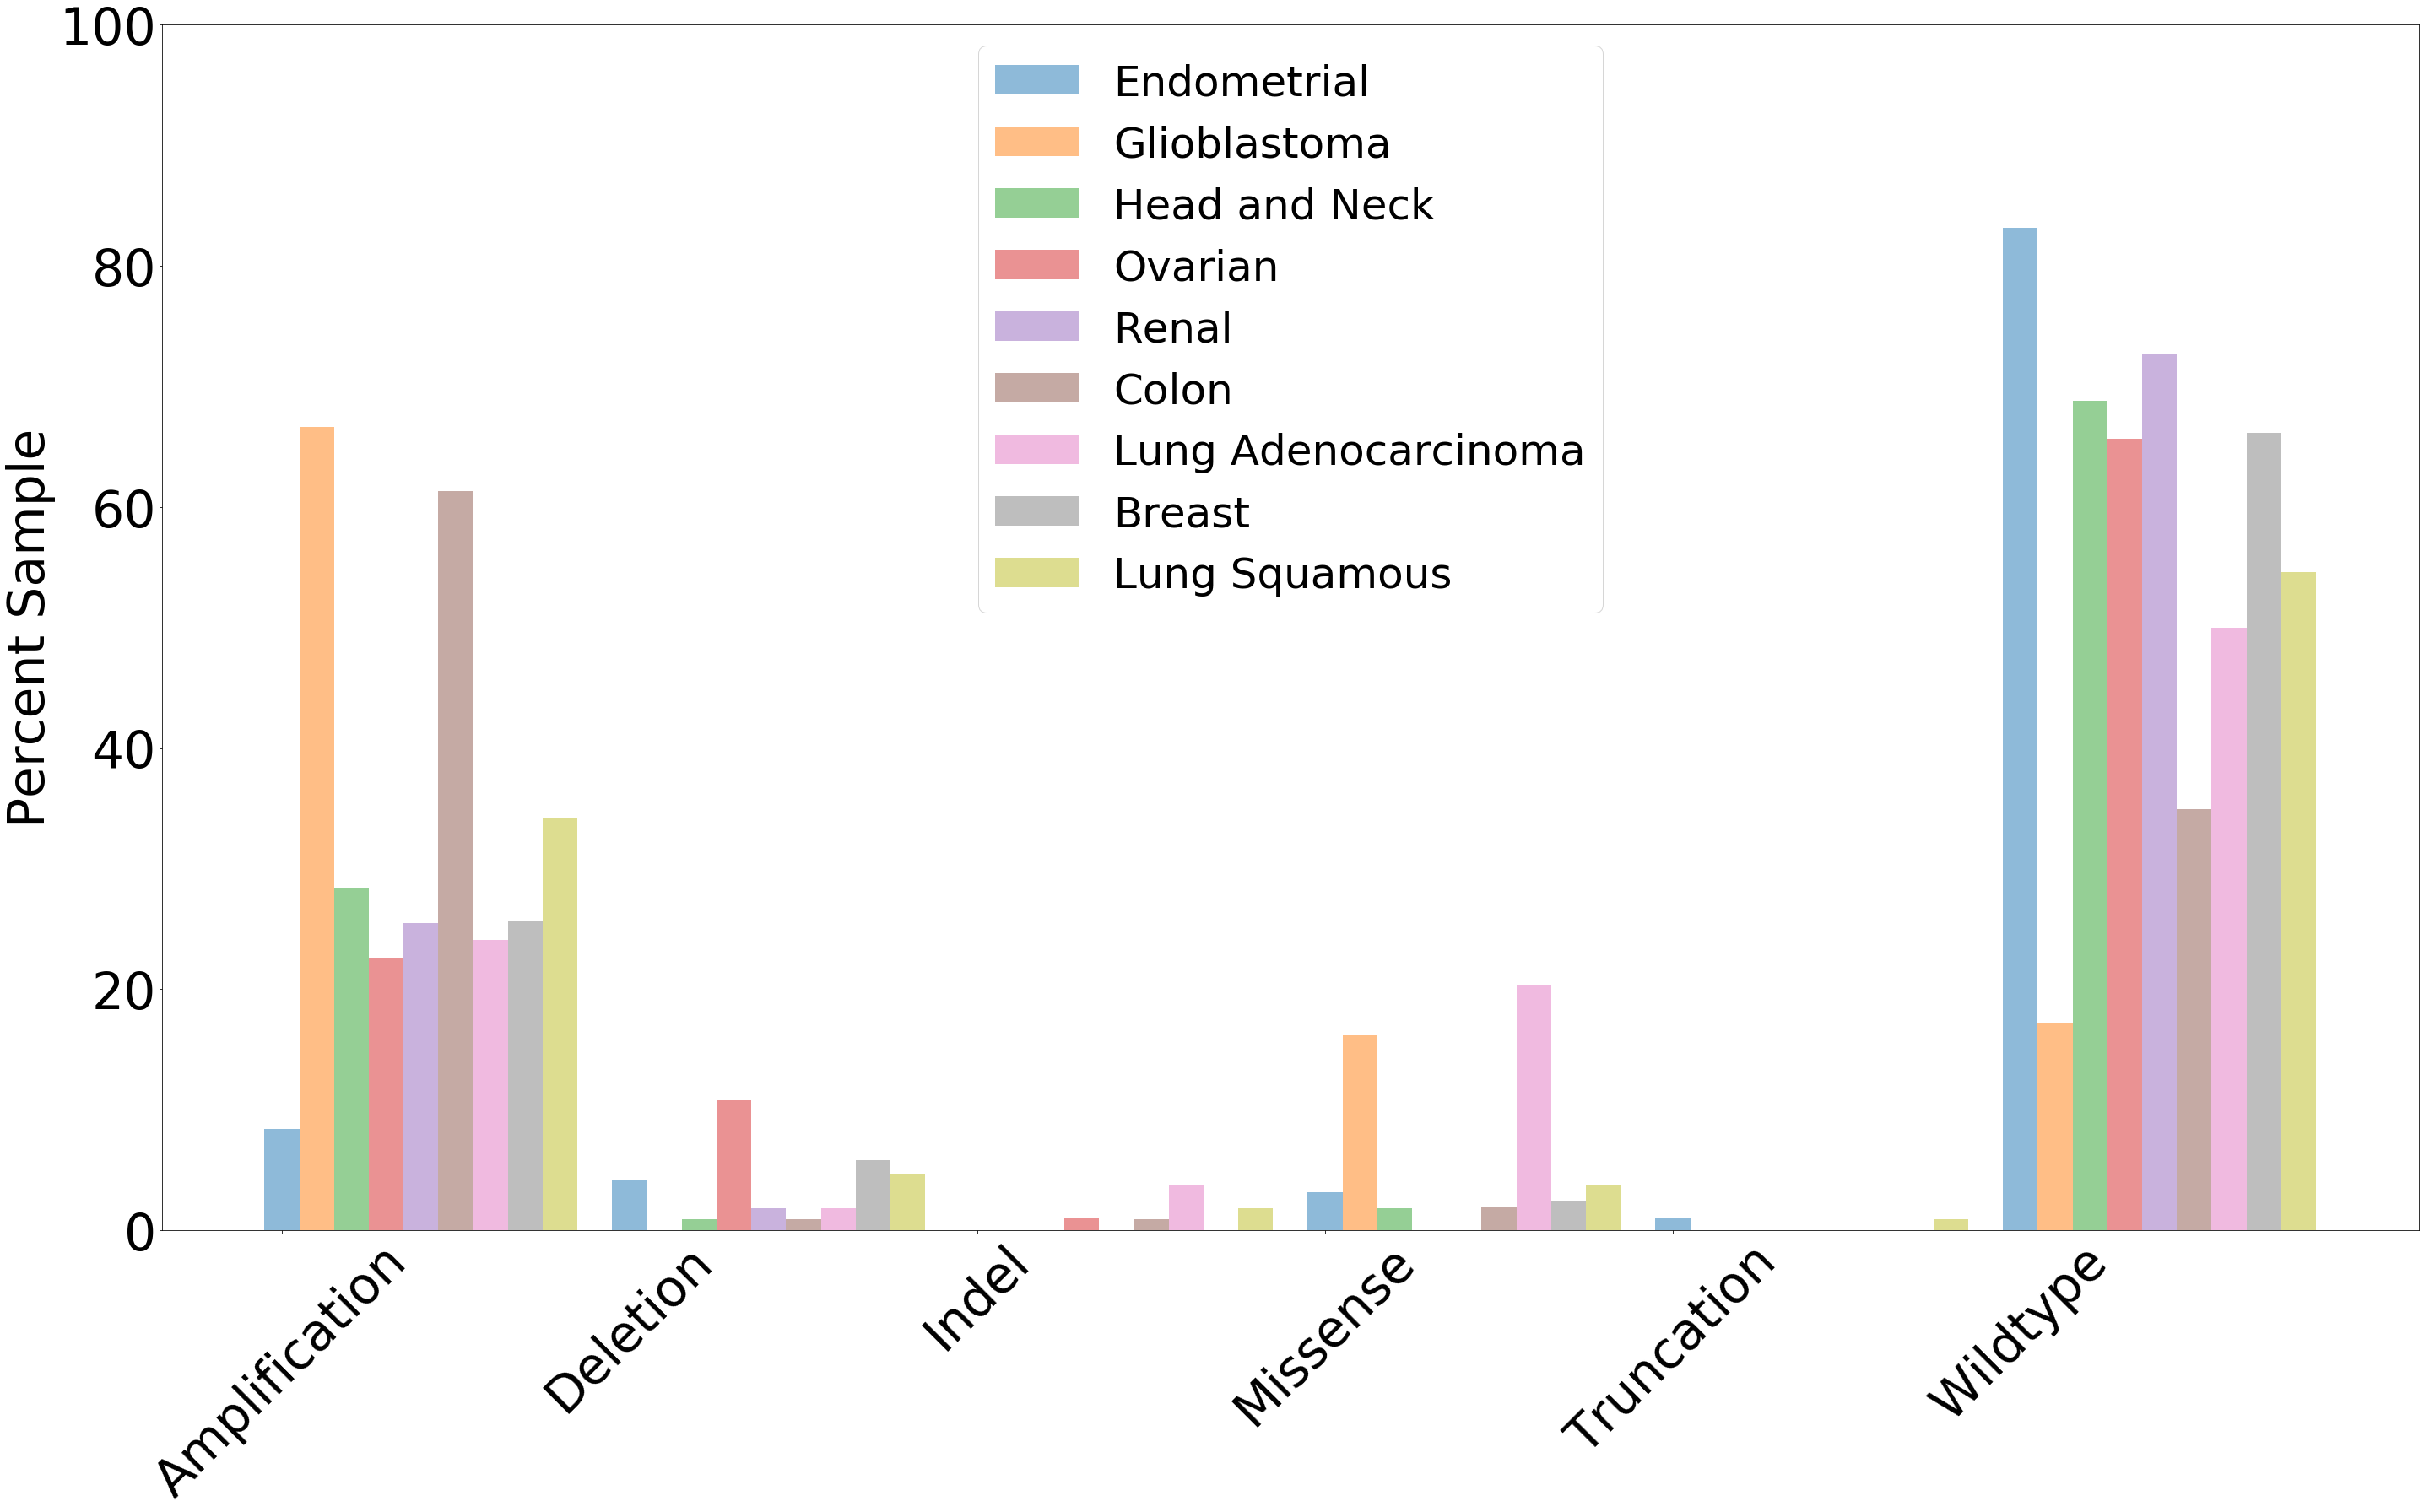

In [8]:
dfs = [endo, gbm, hnscc, ovar, cc, colon, ld, brca, lscc]
names = ['Endometrial', 'Glioblastoma', 'Head and Neck', 'Ovarian', 'Renal', 'Colon', 'Lung Adenocarcinoma', 'Breast',"Lung Squamous"]
p.figure1_plot_mutations(dfs, names, save_to_path = "png_files/Figure3A.png")

# Calculate Percent of samples with Amplification mutations

The manuscript mentions the exact percentage of EGFR amplification mutations. Here is where we derive those percentages. 

In [9]:
#Calculate exact percent
i = 0
for cancer in dfs:

    vc = cancer.Mutation.value_counts()
    total = len(cancer)
    cnv_amp = vc.Amplification
    print(names[i])
    print('total_samples:',total,'\n')
    print(cnv_amp,'/',total,'=', cnv_amp/total,'\n')
    i += 1
   

Endometrial
total_samples: 95 

8 / 95 = 0.08421052631578947 

Glioblastoma
total_samples: 99 

66 / 99 = 0.6666666666666666 

Head and Neck
total_samples: 109 

31 / 109 = 0.28440366972477066 

Ovarian
total_samples: 102 

23 / 102 = 0.22549019607843138 

Renal
total_samples: 110 

28 / 110 = 0.2545454545454545 

Colon
total_samples: 106 

65 / 106 = 0.6132075471698113 

Lung Adenocarcinoma
total_samples: 108 

26 / 108 = 0.24074074074074073 

Breast
total_samples: 121 

31 / 121 = 0.256198347107438 

Lung Squamous
total_samples: 108 

37 / 108 = 0.3425925925925926 



In [10]:
#Calculate exact percent
i = 0
for cancer in dfs:

    vc = cancer.Mutation.value_counts()
    total = len(cancer)
    cnv_amp = vc.Amplification
    print(names[i])
    print('total_samples:',total,'\n')
    print(cnv_amp,'/',total,'=', cnv_amp/total,'\n')
    i += 1
   

Endometrial
total_samples: 95 

8 / 95 = 0.08421052631578947 

Glioblastoma
total_samples: 99 

66 / 99 = 0.6666666666666666 

Head and Neck
total_samples: 109 

31 / 109 = 0.28440366972477066 

Ovarian
total_samples: 102 

23 / 102 = 0.22549019607843138 

Renal
total_samples: 110 

28 / 110 = 0.2545454545454545 

Colon
total_samples: 106 

65 / 106 = 0.6132075471698113 

Lung Adenocarcinoma
total_samples: 108 

26 / 108 = 0.24074074074074073 

Breast
total_samples: 121 

31 / 121 = 0.256198347107438 

Lung Squamous
total_samples: 108 

37 / 108 = 0.3425925925925926 

